In [1]:
%matplotlib inline
import requests
import gzip
import numpy as np
import pandas as pd
import patoolib
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
from time import time
from sklearn import metrics
import torchvision.datasets as datasets
from torch.autograd import Variable
from torchvision.transforms import ToTensor
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA

In [2]:
# trainning and validation data
all_data=pd.read_csv('ass4_data.csv',index_col=False,header=None)
shuffled_data=all_data.sample(frac = 1)
# feature=pd.read_csv('features.csv',index_col=False,header=None)
# target=pd.read_csv('target.csv',index_col=False,header=None)
feature=shuffled_data.iloc[:, 0:127]
# target=shuffled_data.iloc[:, 126]



### Reading values only for trainning data
feature_in=feature.values
# target_in=target.values

# converting to tensor train data
feature_tensor=feature_in#[0:10000]
# target_tensor=target_in[0:10000]

# converting to tensor test data
# feature_tensor_test=feature_in#[10000:15000]
# target_tensor_test=target_in[10000:15000]

In [3]:
colors = ["#476A2A","#7851B8",'#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E', 'black']

In [4]:
# label_list=[]

# for i in range(1,21):
#         km = KMeans(n_clusters=i, random_state=0)
#         km = km.fit(feature_tensor)
#         labels_km = km.labels_
#         label_list.append(labels_km)
#         # clusters_km = km.predict(feature_tensor_test)

        

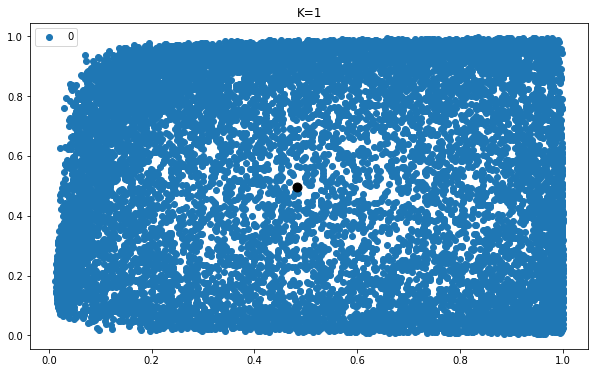

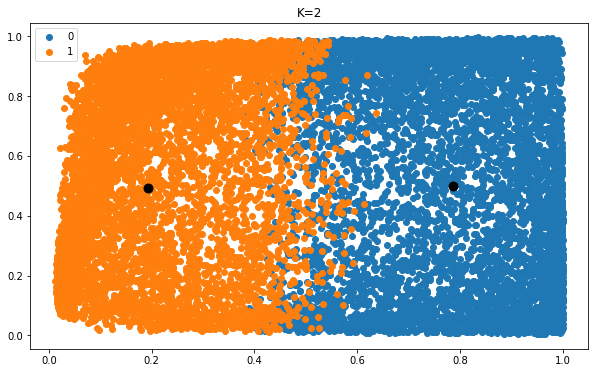

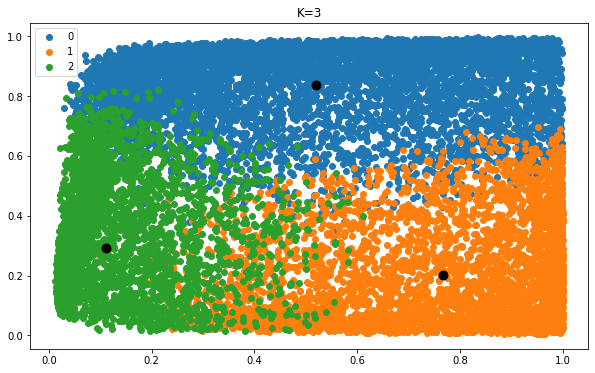

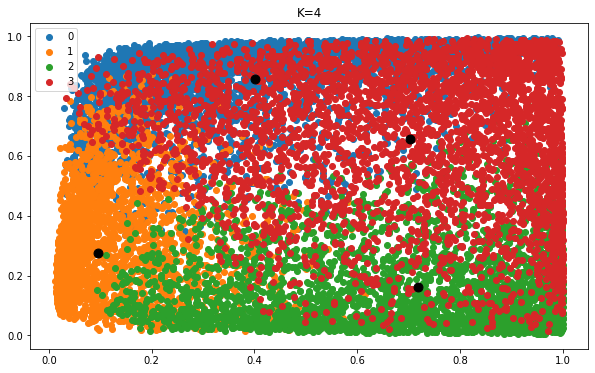

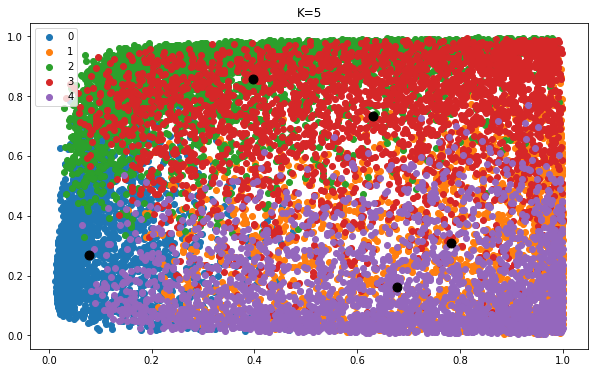

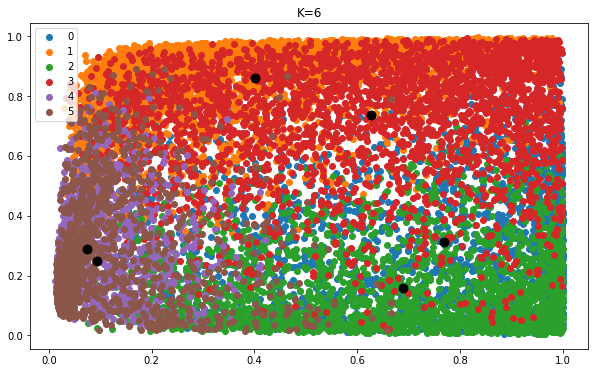

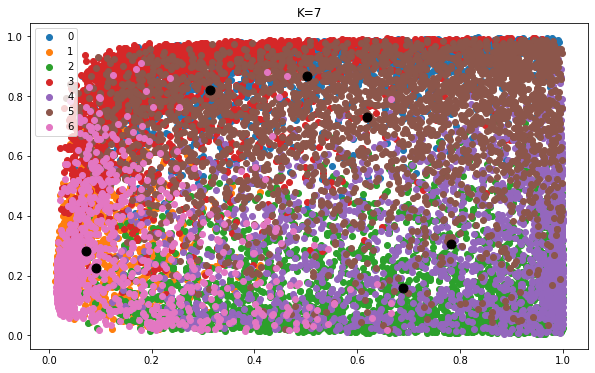

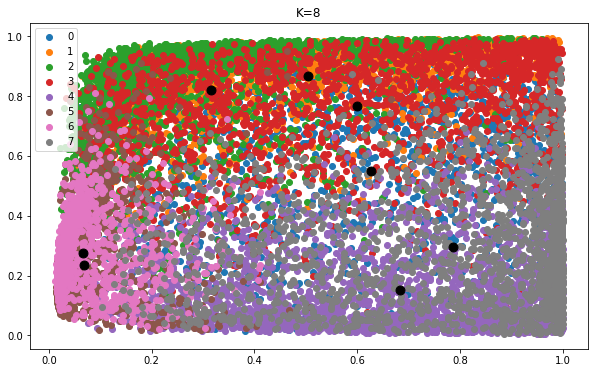

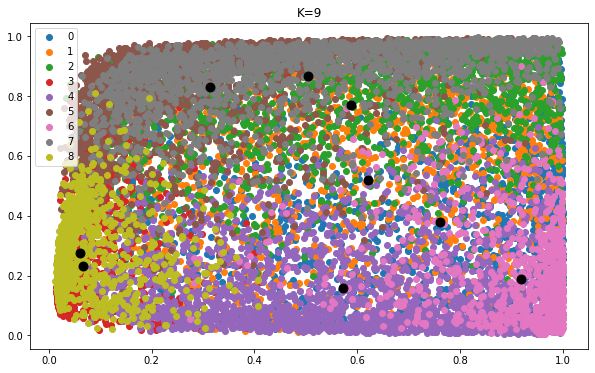

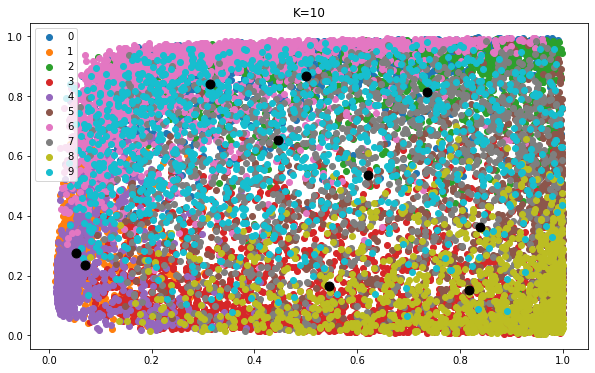

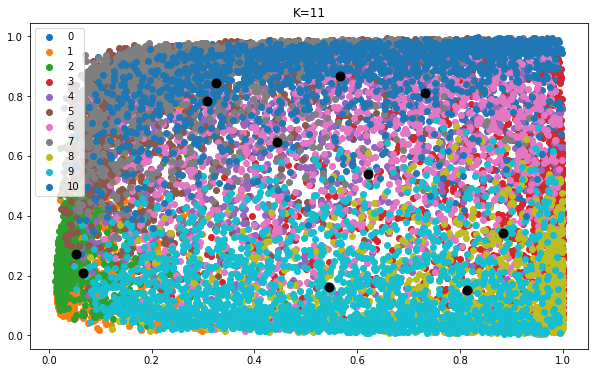

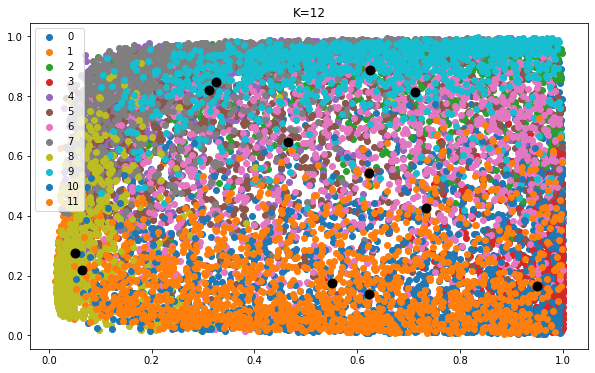

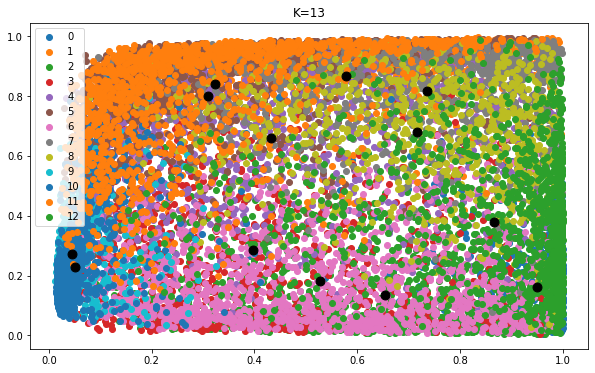

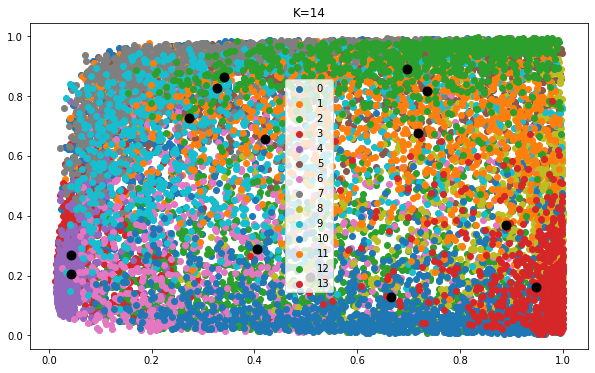

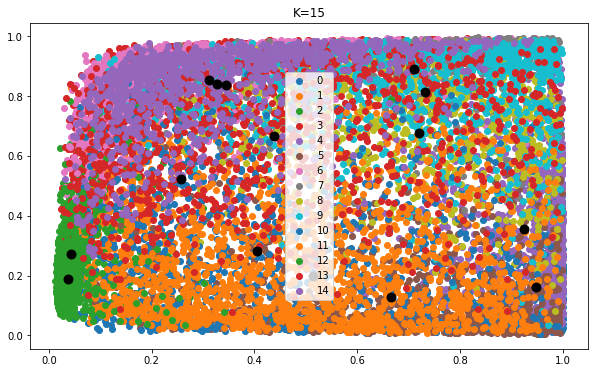

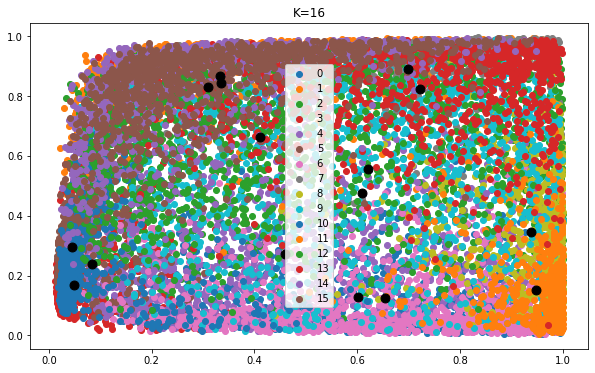

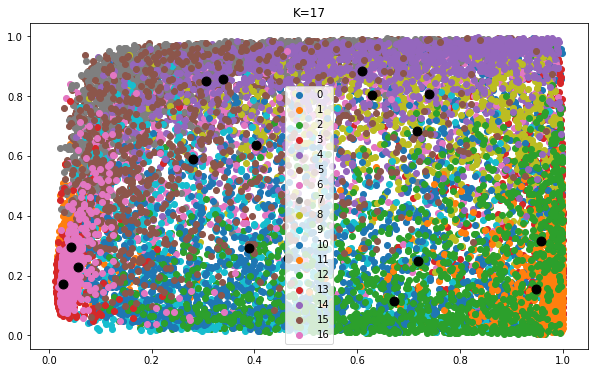

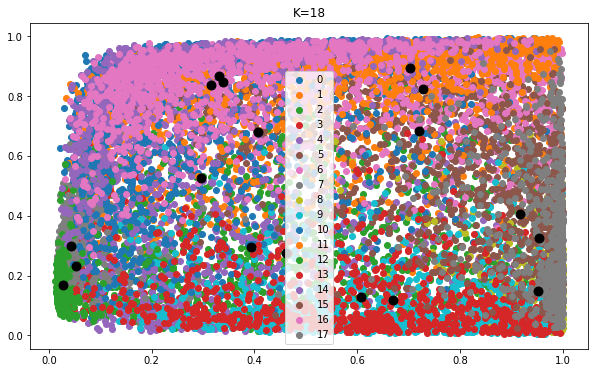

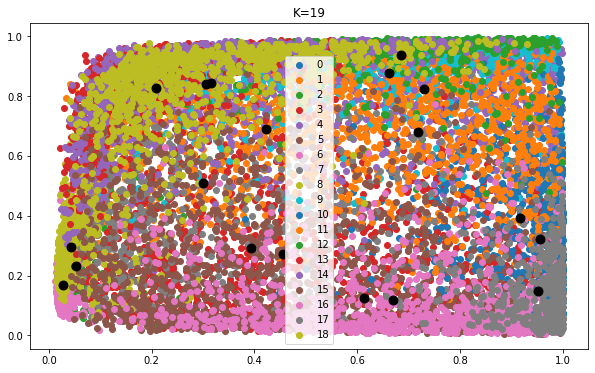

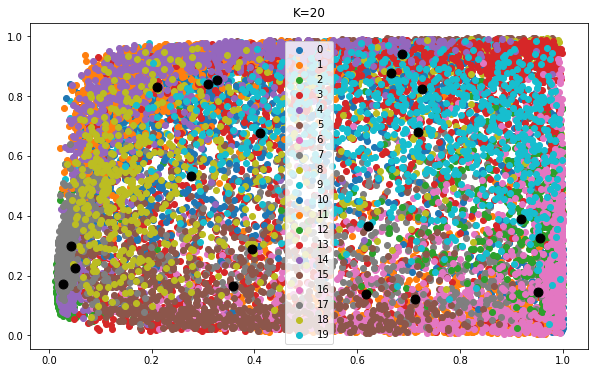

In [6]:
label_list=[]
for i in range(1,21):
        km = KMeans(n_clusters=i, random_state=0)
        km = km.fit(feature_tensor)
        labels_km = km.labels_
        # label_list.append(labels_km)
        clusters_km = km.predict(feature_tensor)
        label_list.append(clusters_km)
        

        #Getting unique labels

        u_labels = np.unique(clusters_km)
        centroids = km.cluster_centers_
        fig= plt.figure(figsize=(10,6))
        #plotting the results:
        
        for j in u_labels:
                plt.scatter(feature_tensor[clusters_km == j , 0] , feature_tensor[clusters_km == j , 1] , label = j)
        plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
        plt.legend()
        plt.title(f"K={i}")
        plt.show()

In [60]:
import pandas as pd
from pathlib import Path
dataframe=pd.DataFrame(label_list)
# dataframe

src_path  = r"D:\Desktop\Gate 2021\Applied\College\IITD\APPLIED MECHANICS\Sem 3\Intro to ML\assignment4\part_2\labels"


for i in (np.linspace(0,20,num=21)):
    p = Path(src_path).parent.joinpath(f"{int(i)}_classes.csv")
    dataframe[int(i):int(i+1)].to_csv(p,index=False)



# dataframe=pd.DataFrame(label_list)
# dataframe

In [63]:
# for cpnverting rows to columns
# df = pd.DataFrame(df.values.ravel(), columns=['Column'])

# example
df = pd.DataFrame(dataframe[14:15].values.ravel(), columns=['Column'])
df

Column
0          14
1           9
2           3
3           4
4           5
...       ...
14995      10
14996      14
14997       2
14998       8
14999       6

[15000 rows x 1 columns]

In [7]:
## Lets reduce the dimensions to 25 and do the Kmeans

t=time()

pca = PCA(n_components=25, random_state=0)
train_pca = pca.fit_transform(feature_tensor)
# test_pca = pca.fit_transform(testX, y_test)

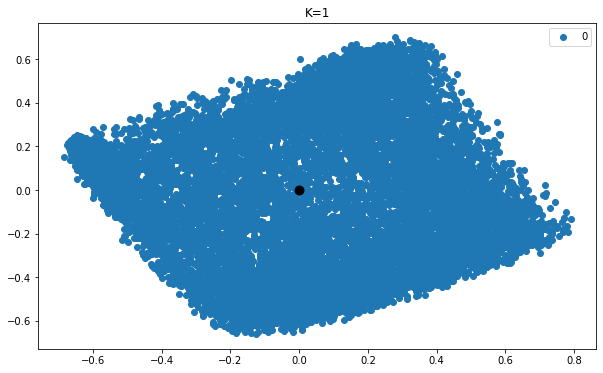

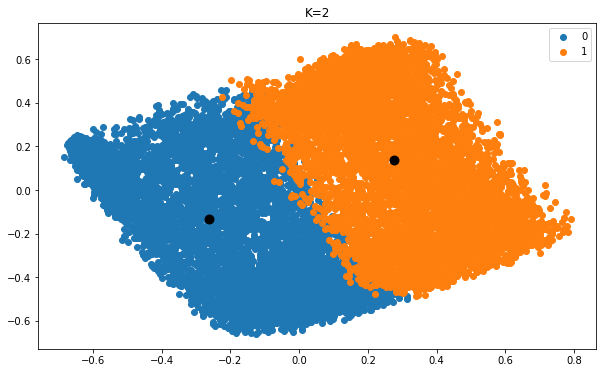

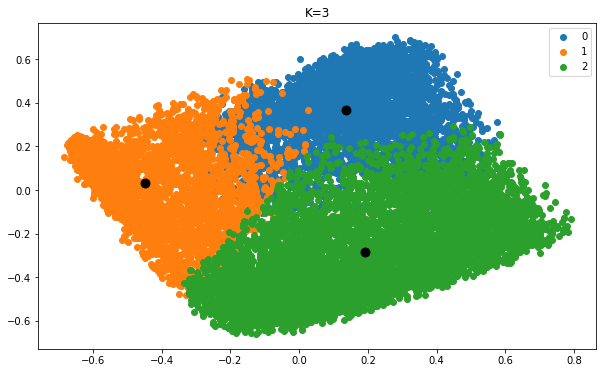

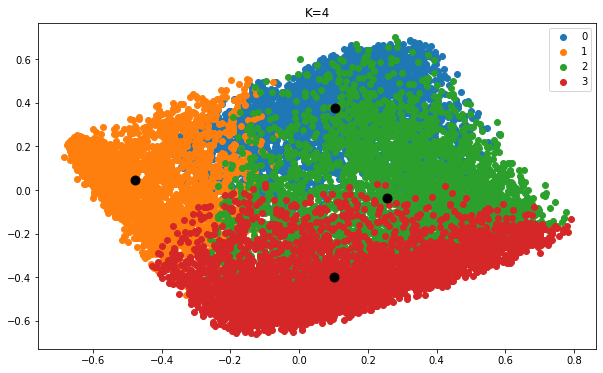

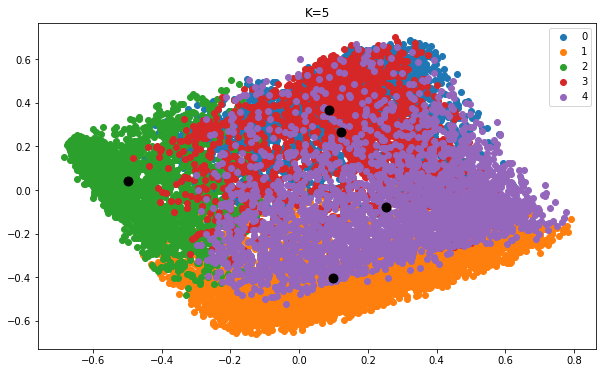

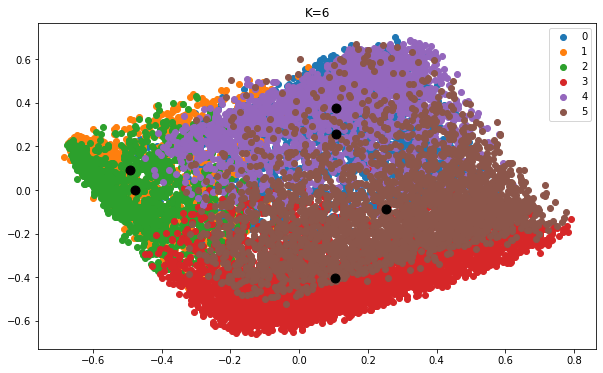

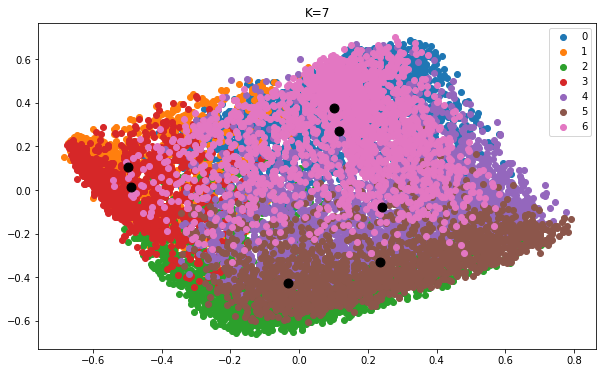

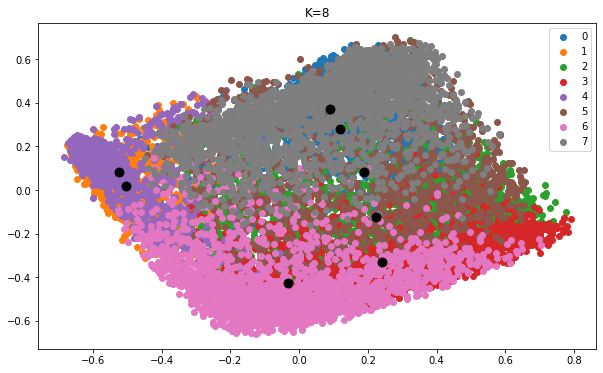

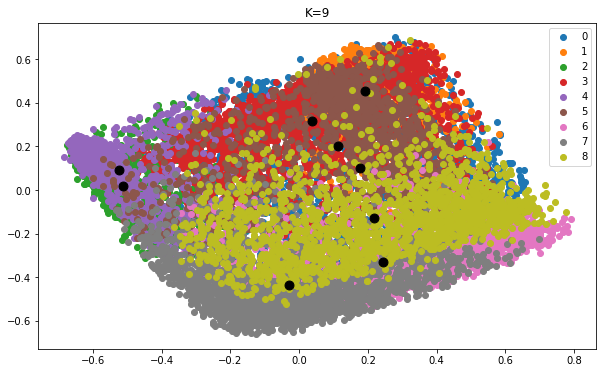

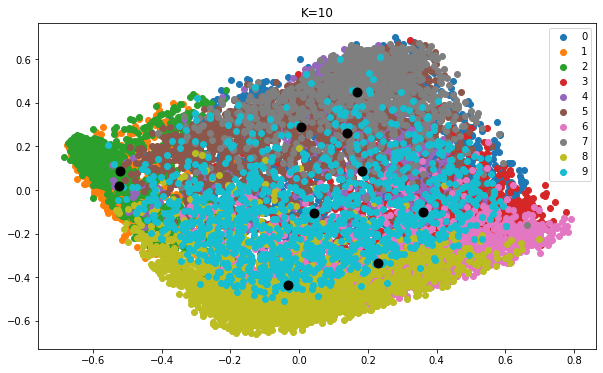

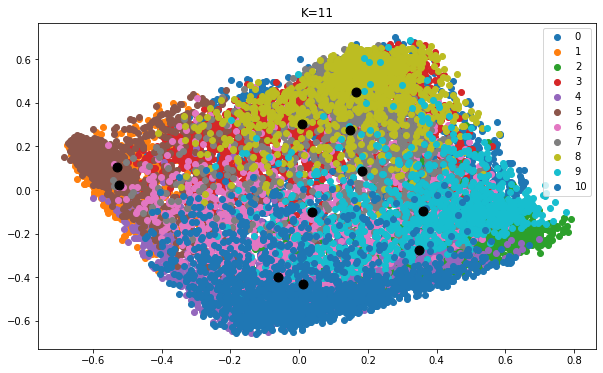

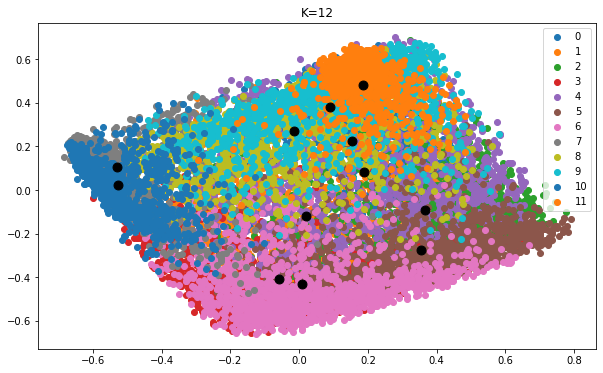

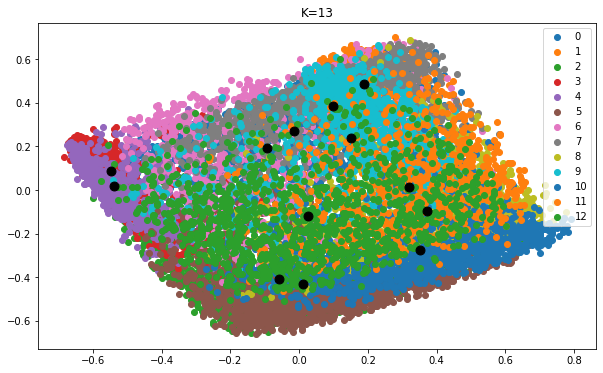

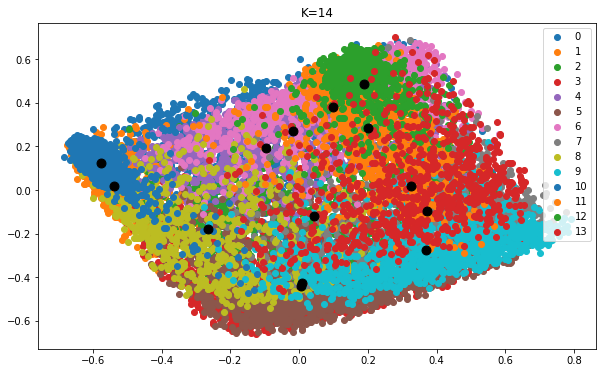

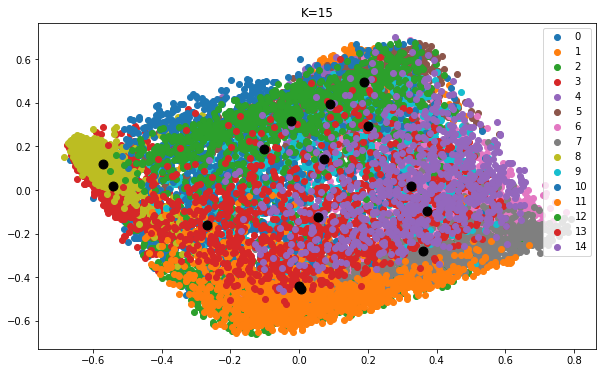

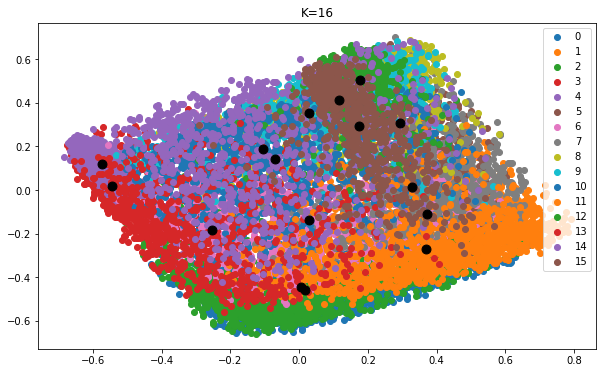

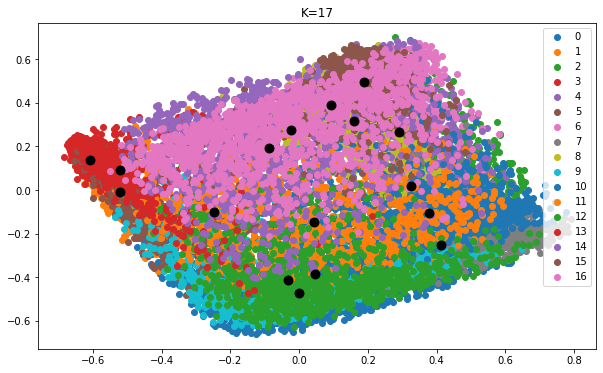

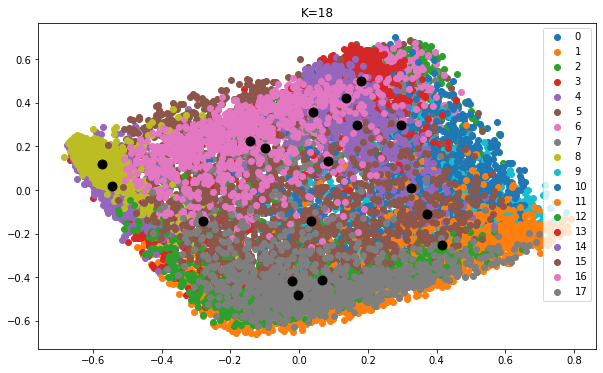

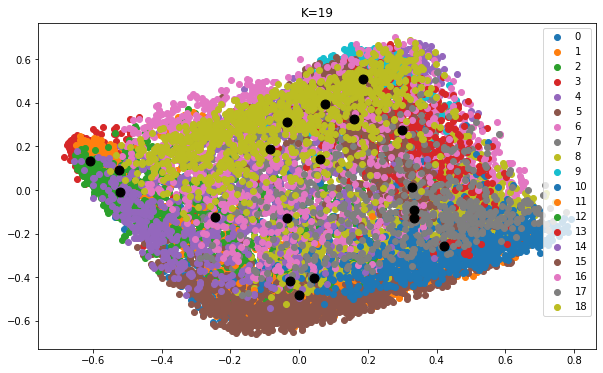

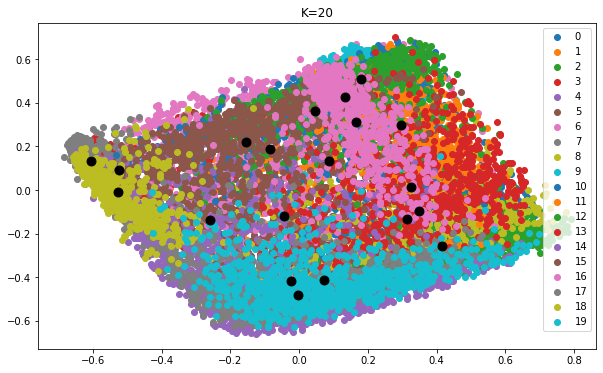

In [9]:
label_list_pca=[]
for i in range(1,21):
        km = KMeans(n_clusters=i, random_state=0)
        km = km.fit(train_pca)
        labels_km = km.labels_
        # label_list.append(labels_km)
        clusters_km = km.predict(train_pca)
        label_list_pca.append(clusters_km)
        

        #Getting unique labels

        u_labels = np.unique(clusters_km)
        centroids = km.cluster_centers_
        fig= plt.figure(figsize=(10,6))
        #plotting the results:
        
        for j in u_labels:
                plt.scatter(train_pca[clusters_km == j , 0] , train_pca[clusters_km == j , 1] , label = j)
        plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
        plt.legend()
        plt.title(f"K={i}")
        plt.show()

In [ ]:
# ## Lets reduce the dimensions to 10 and do the Kmeans

# t=time()

# pca = PCA(n_components=10, random_state=0)
# train_pca = pca.fit_transform(feature_tensor)
# # test_pca = pca.fit_transform(testX, y_test)


# label_list_pca=[]
# for i in range(1,21):
#         km = KMeans(n_clusters=i, random_state=0)
#         km = km.fit(train_pca)
#         labels_km = km.labels_
#         # label_list.append(labels_km)
#         clusters_km = km.predict(train_pca)
#         label_list_pca.append(clusters_km)
        

#         #Getting unique labels

#         u_labels = np.unique(clusters_km)
#         centroids = km.cluster_centers_
#         fig= plt.figure(figsize=(10,6))
#         #plotting the results:
        
#         for j in u_labels:
#                 plt.scatter(train_pca[clusters_km == j , 0] , train_pca[clusters_km == j , 1] , label = j)
#         plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
#         plt.legend()
#         plt.show()


# You can use  this to play with different pca dimensions
